Attribute Information:

Car Name – Name of the car, 
Cyl – No of cylinders in the car – Multivalued discrete, 
Disp – Displacement – continuous, 
Hp – Horsepower – continuous, 
Wt – Weight – continuous, 
Acc – Accleration – continuous, 
Yr – Model of the car – Multivalued discrete

1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)
4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [1]:
# Importing the necessary packages

import pandas as pd
import numpy as np

In [2]:
# Reading the csv file

car_dataset = pd.read_csv("cars-dataset.csv")
car_dataset.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [3]:
# Finding the types of attributes
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [4]:
# Exploring data and performing analysis
car_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [5]:
# 'name' and 'hp' columns are missing. Column 'name' is non-numeric. 
# However, column 'hp' must have some non numeric entry which needs to be treated.

In [6]:
# Checking which entries are non numeric

temp = pd.DataFrame(car_dataset.hp.str.isdigit()) 
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [7]:
# First, replacing the non numeric (?) entries with nan
car_dataset = car_dataset.replace('?', np.nan)

# Second, replacing the nan entries with median of 'hp' column
car_dataset['hp'] = car_dataset['hp'].fillna(car_dataset['hp'].median())

# Third, changing the datatype of 'hp' column fron object to float
car_dataset['hp'] = car_dataset['hp'].astype('float64')

In [8]:
# Evaluating the information about the types of attributes
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [9]:
# Finding out the correlation
car_dataset.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.804203
hp,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.773453
wt,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,1.000000


In [10]:
# Importing the necessary packages and enable plotting of graphs in Jupyter notebook

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for styling the graph with grid
plt.style.use('ggplot')

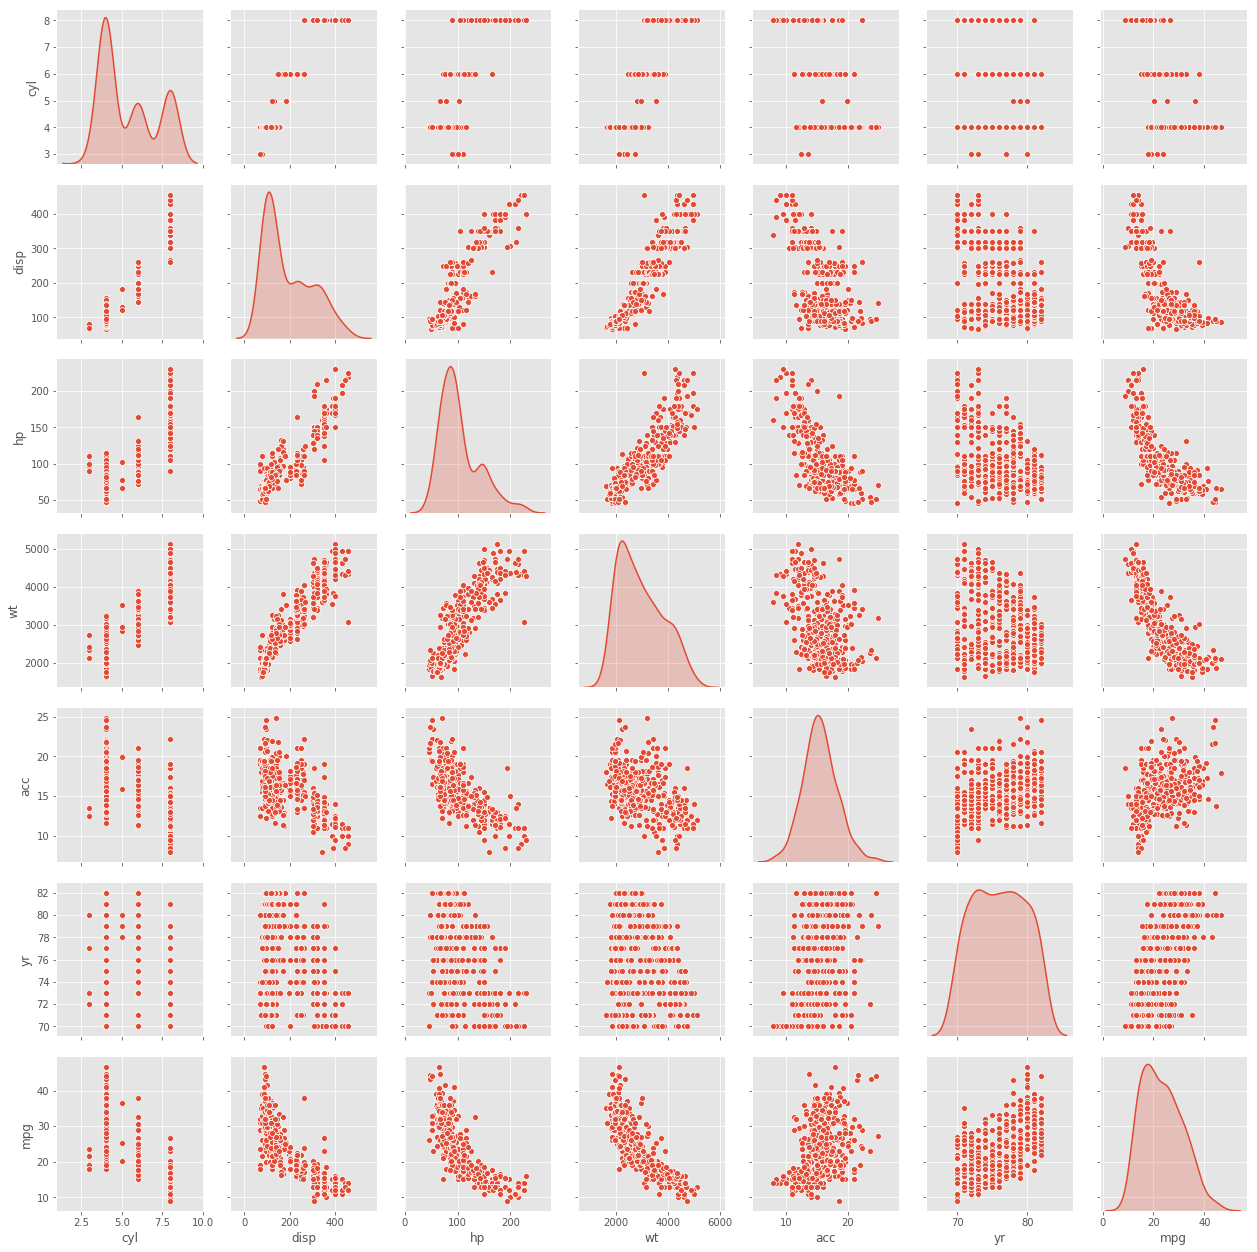

In [11]:
# Creating pairplot
sns.pairplot(car_dataset, diag_kind='kde')

In [12]:
# Observations:
# Atleast one Gaussian curve and at most 3 Gaussian curves can be seen.
# Therefore, there might be 3 different clusters in the dataset.
# In correlation matrix, the distribution of column 'yr' shows that it is almost weakly correlated with the other columns. 

In [13]:
# Dropping the 'name' and 'yr' columns ('name' is a non numeric column and 'yr' is not needed)
car_df_attr = car_dataset.drop(['car name', 'yr'], axis = 1)

In [14]:
# Since the dimensions of the data are not really matching with each other, we need to scale the data.

from scipy.stats import zscore
car_df_attr_z = car_df_attr.apply(zscore)
car_df_attr_z.head(5)

,cyl,disp,hp,wt,acc,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543


In [15]:
# Checking optimal number of clusters-
from sklearn.cluster import KMeans
from scipy.spatial import distance
distortion = []

cluster_range = range(2, 12)   # expecting 3 to 4 clusters
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(car_df_attr_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  distortion.append(sum(np.min(distance.cdist(car_df_attr_z, clusters.cluster_centers_, 'euclidean'), axis=1))/ car_df_attr_z.shape[0])

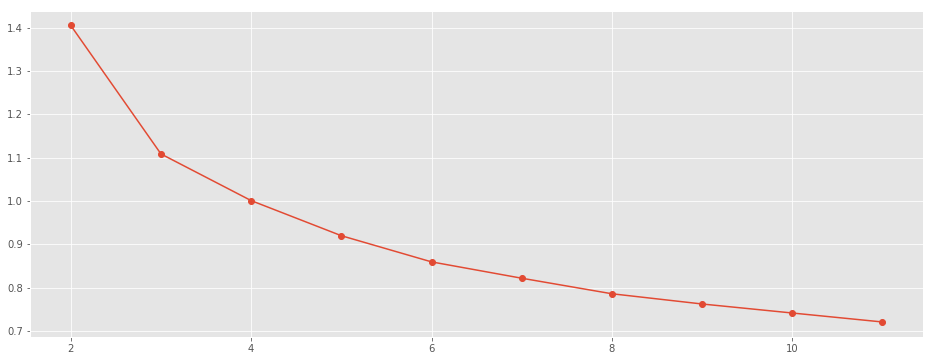

In [16]:
# Elbow plot
plt.figure(figsize=(16, 6))
plt.plot(cluster_range, distortion, marker = "o" )

In [17]:
# From the above graph, we can find that the optimal value of K is 3.

In [18]:
# Cluster dataframe
cluster_df = KMeans(n_clusters = 3, random_state = 2)  # Number of clusters
cluster_df.fit(car_df_attr_z)  # Fitting the input data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [19]:
# Getting the cluster labels
labels = cluster_df.predict(car_df_attr_z)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2,

In [20]:
car_df_attr_z['label_cluster'] = labels

In [21]:
car_df_z_0 = car_df_attr_z[car_df_attr_z['label_cluster'] == 0]
car_df_z_1 = car_df_attr_z[car_df_attr_z['label_cluster'] == 1]
car_df_z_2 = car_df_attr_z[car_df_attr_z['label_cluster'] == 2]

In [22]:
# The separate clusters are:

In [23]:
car_df_z_0

,cyl,disp,hp,wt,acc,mpg,label_cluster
14,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,0.062185,0
18,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,0.446497,0
19,-0.856321,-0.925936,-1.527300,-1.342463,1.790672,0.318393,0
20,-0.856321,-0.801103,-0.453287,-0.352841,0.701436,0.190289,0
21,-0.856321,-0.829911,-0.374700,-0.638968,-0.387801,0.062185,0
22,-0.856321,-0.858718,-0.243723,-0.703997,0.701436,0.190289,0
23,-0.856321,-0.695475,0.227795,-0.870708,-1.113959,0.318393,0
29,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,0.446497,0
30,-0.856321,-0.513026,-0.374700,-0.835237,-0.024722,0.574601,0
31,-0.856321,-0.772295,-0.243723,-0.877802,-0.569341,0.190289,0


In [24]:
car_df_z_1

,cyl,disp,hp,wt,acc,mpg,label_cluster
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,1
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.090751,1
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.218855,1
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.218855,1
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.218855,1
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.090751,1


In [25]:
car_df_z_2

,cyl,disp,hp,wt,acc,mpg,label_cluster
15,0.320935,0.043923,-0.243723,-0.162483,-0.024722,-0.194023,2
16,0.320935,0.053526,-0.191332,-0.232242,-0.024722,-0.706439,2
17,0.320935,0.063128,-0.505677,-0.453340,0.156817,-0.322127,2
24,0.320935,0.053526,-0.374700,-0.381217,-0.206262,-0.322127,2
33,0.320935,0.370411,-0.112746,-0.397770,-0.932419,-0.578335,2
34,0.320935,0.303193,0.018232,0.554017,-0.024722,-0.962647,2
35,0.320935,0.543257,-0.112746,0.423960,-0.024722,-0.834543,2
36,0.320935,0.543257,-0.427091,0.392036,-0.024722,-0.578335,2
37,0.320935,0.370411,-0.112746,0.375483,-0.024722,-0.706439,2
45,0.320935,0.620078,0.149209,-0.009961,-0.750880,-0.706439,2


In [26]:
# Dividing the data into training and test data sets for all clusters accordingly
from sklearn.model_selection import train_test_split

X1 = car_df_z_0.drop(['mpg', 'label_cluster'], axis = 1)
Y1 = car_df_z_0['mpg']
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = 0.3, random_state = 101)

X2 = car_df_z_1.drop(['mpg', 'label_cluster'], axis = 1)
Y2 = car_df_z_1['mpg']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.3, random_state = 101)

X3 = car_df_z_2.drop(['mpg', 'label_cluster'], axis = 1)
Y3 = car_df_z_2['mpg']
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size = 0.3, random_state = 101)

In [27]:
# Building Linear Regression model

from sklearn.linear_model import LinearRegression
car_df_z_LRModel = LinearRegression()

In [28]:
# Using linear regression model on first cluster

car_df_z_LRModel.fit(X_train1, Y_train1)
Y_pred_1 = car_df_z_LRModel.predict(X_test1)

# The coefficients of this model

for index_of_col, col_name in enumerate(X_train1.columns):
    print("The coefficient for", col_name, "is", car_df_z_LRModel.coef_[index_of_col])

The coefficient for cyl is 1.0452336606671133
The coefficient for disp is -0.012949533636438875
The coefficient for hp is -1.1479164951601057
The coefficient for wt is -0.27071394462230614
The coefficient for acc is -0.22572069086589086


In [29]:
# Using linear regression model on second cluster

car_df_z_LRModel.fit(X_train2, Y_train2)
Y_pred_2 = car_df_z_LRModel.predict(X_test2)

# The coefficients of this model

for index_of_col, col_name in enumerate(X_train2.columns):
    print("The coefficient for", col_name, "is", car_df_z_LRModel.coef_[index_of_col])

The coefficient for cyl is -0.3692761931312931
The coefficient for disp is 0.11869853545278353
The coefficient for hp is -0.2298154239559796
The coefficient for wt is -0.17735365412194043
The coefficient for acc is -0.07574909146667405


In [30]:
# Using linear regression model on third cluster

car_df_z_LRModel.fit(X_train3, Y_train3)
Y_pred_3 = car_df_z_LRModel.predict(X_test3)

# The coefficients of this model

for index_of_col, col_name in enumerate(X_train3.columns):
    print("The coefficient for", col_name, "is", car_df_z_LRModel.coef_[index_of_col])

The coefficient for cyl is 0.3835753541852745
The coefficient for disp is -0.28509137265571066
The coefficient for hp is -0.019941841619295474
The coefficient for wt is -0.40120686168553865
The coefficient for acc is 0.08532654774160976
